In [535]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import keras
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,mean_squared_error

In [15]:
pd.set_option('display.max_columns',None)
data = pd.read_excel('sample_data.xlsx')

In [17]:
data

,Payroll Date,Count,PID,Install Partner,Customer Name,Sales Rep,kW,Cancel,Approved,M1,M2,State,Product,Gross Account value,EPC,Net EPC,Dealer Fee %,Dealer Fee $,SOW $,Redline,Total $ For Acct,Prev $ Paid,Last Date Pd,M1 $ This Week,Install (M2) $ This Week,Prev Deducted $,Cancel Fee,Cancel Deduction,Lead Cost $,ADV Pay Back $,Total $ in Period,Setter,Override 1,Override 2,Override 3,Notes,Rep Redline,Company Margin,Test,Setter Prior Pmts,Closer Prior Pmts,Overrides,Overrides 2,Override 3.1,Setter Payment,Closer Payment,Test.1,Still Due,Test.2,Testing Installer Redline
0,2021-03-17,3,ESG17740,Benjamin Wise,Donna Moody,Prof. Thompson,4.95,NaN,2021-02-19 00:00:00,2021-02-22,NaT,FL,LOAN,19409.23,3.921,2.998,0.2349,4569.23,0,2.2,3950,NaN,NaN,1185,0,NaN,0,0,0,0,1185,Dr. Clark,NaN,NaN,NaN,Splitting with setter,2.40,0.2,0.10,NaN,NaN,NaN,NaN,NaN,495.0,0.00,0,2765.00,0,-0.1
1,2021-04-14,3,ESG17740,Benjamin Wise,Donna Moody,Prof. Thompson,4.95,NaN,2021-02-19 00:00:00,2021-02-22,2021-04-02,FL,LOAN,19409.23,3.921,2.695,0.2349,4569.23,1500,2.2,2450,NaN,NaN,-450,1715,NaN,0,0,0,0,1265,Dr. Clark,NaN,NaN,NaN,Splitting with setter,2.40,0.2,0.25,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0,1185.00,0,-0.1
2,2021-05-19,3,ESG17740,Benjamin Wise,Donna Moody,Prof. Thompson,4.95,NaN,2021-02-19 00:00:00,2021-02-22,2021-04-02,FL,LOAN,19409.23,3.921,2.695,0.2349,4569.23,1500,2.1,2945,2450,2021-04-14 00:00:00,883.5,-388.5,NaN,0,0,0,0,495,Dr. Clark,NaN,NaN,NaN,Splitting with setter,2.30,0.2,0.25,482.63,NaN,NaN,NaN,NaN,0.0,1472.37,0,0.00,0,0.0
3,2021-03-17,3,ESG17780,Benjamin Wise,Paul Brown,Prof. Thompson,9.24,NaN,2021-02-20 00:00:00,2021-02-23,NaT,FL,LOAN,53726.31,5.815,3.127,0.2349,12630.31,12200,2.2,8568,NaN,NaN,2570.4,0,NaN,0,0,0,0,2570.4,NaN,NaN,NaN,NaN,No Split,2.40,0.2,-2.52,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0,5997.60,0,-0.1
4,2021-04-14,3,ESG17780,Benjamin Wise,Paul Brown,Prof. Thompson,9.24,NaN,2021-02-20 00:00:00,2021-02-23,2021-03-30,FL,LOAN,50955.74,5.515,2.898,0.2349,11979.5,12200,2.2,6448.24,NaN,NaN,-635.93,4513.77,NaN,0,0,0,0,3877.84,NaN,NaN,NaN,NaN,No Split,2.40,0.2,1.28,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0,2570.40,0,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,2022-09-30,1,LIS11143,Nicholas Owens,Melissa Sheppard,Mr. Jackson,15.17,NaN,01/00/00,2022-09-12,NaT,CO,Cash,66180,4.363,3.85,-,-,7775.5,2.2,25030.5,-,NaN,7509.15,-,NaN,-,-,-,-,7509.15,Dr. Johnson,NaN,NaN,NaN,NaN,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,17521.35,NaN,NaN
1518,2022-09-30,1,LIS11294,Nicholas Owens,Susan Khan,Mr. Jackson,6.16,NaN,01/00/00,2022-09-12,NaT,CO,Loan,36656.52,5.951,4.3,0.2774,10168.52,-,2.2,12936,-,NaN,3880.8,-,NaN,-,-,-,-,3880.8,Dr. Johnson,NaN,NaN,NaN,NaN,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,616.0,NaN,NaN,9055.20,NaN,NaN
1519,2022-09-30,1,LIS11569,Nicholas Owens,Joshua French,Mr. Jackson,6.60,NaN,01/00/00,2022-09-12,NaT,CO,Loan,42543.22,6.446,4.4,0.3174,13503.22,-,2.2,14520,-,NaN,4356,-,NaN,-,-,-,-,4356,Dr. Johnson,NaN,NaN,NaN,NaN,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.0,NaN,NaN,10164.00,NaN,NaN
1520,2022-09-30,1,LIS11496,Nicholas Owens,Dr. Morgan Robinson,Prof. Davis,5.72,NaN,01/00/00,2022-09-15,NaT,CO,Cash,22308,3.9,3.9,-,-,-,2.2,9724,-,NaN,2917.2,-,NaN,-,-,-,-,2917.2,Mr. Wilson,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.0,NaN,NaN,6806.80,NaN,NaN


In [428]:
y_train2 = data['Test.1']
y_train3 = data['Test.2']

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Payroll Date               1522 non-null   datetime64[ns]
 1   Count                      1522 non-null   int64         
 2   PID                        1522 non-null   object        
 3   Install Partner            1522 non-null   object        
 4   Customer Name              1522 non-null   object        
 5   Sales Rep                  1522 non-null   object        
 6   kW                         1522 non-null   float64       
 7   Cancel                     100 non-null    object        
 8   Approved                   1521 non-null   object        
 9   M1                         1508 non-null   datetime64[ns]
 10  M2                         547 non-null    datetime64[ns]
 11  State                      1522 non-null   object        
 12  Produc

In [435]:
regressor = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)

In [393]:
train = data.drop(['Test.1','Test.2',],axis=1)
train['Test'].replace('NaN', np.nan, inplace=True)

In [394]:
train.dropna(subset=['Test'], inplace=True)
train.reset_index(inplace=True)

In [395]:
train.drop(['index','Sales Rep','Payroll Date','Customer Name','Install Partner','PID','Cancel','Approved','M1','M2','State','Product','Setter','Last Date Pd','Override 1','Override 2','Override 3','Prev Deducted $','Cancel Deduction','ADV Pay Back $','Count','Notes'],axis=1,inplace=True)

In [396]:
train = train.replace('-',0)

In [409]:
train = train.replace(np.nan,0)

In [413]:
matrix = train.corr()

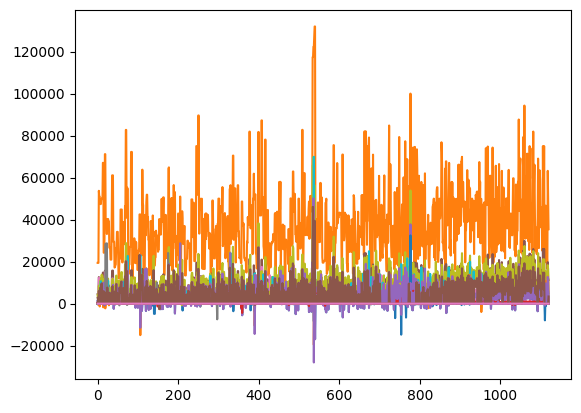

In [498]:
plt.plot(train);

In [437]:
all_data = train.drop(['Test'],axis=1)
labels = train['Test']

In [442]:
x_train,x_test,y_train,y_test = train_test_split(all_data,labels)

In [479]:
regressor1 = regressor.fit(x_train,y_train)

In [480]:
pred1 = regressor1.predict(x_test)

In [481]:
mse = mean_squared_error(y_test,pred1)

In [482]:
mse

4336896.375162524

<Axes: >

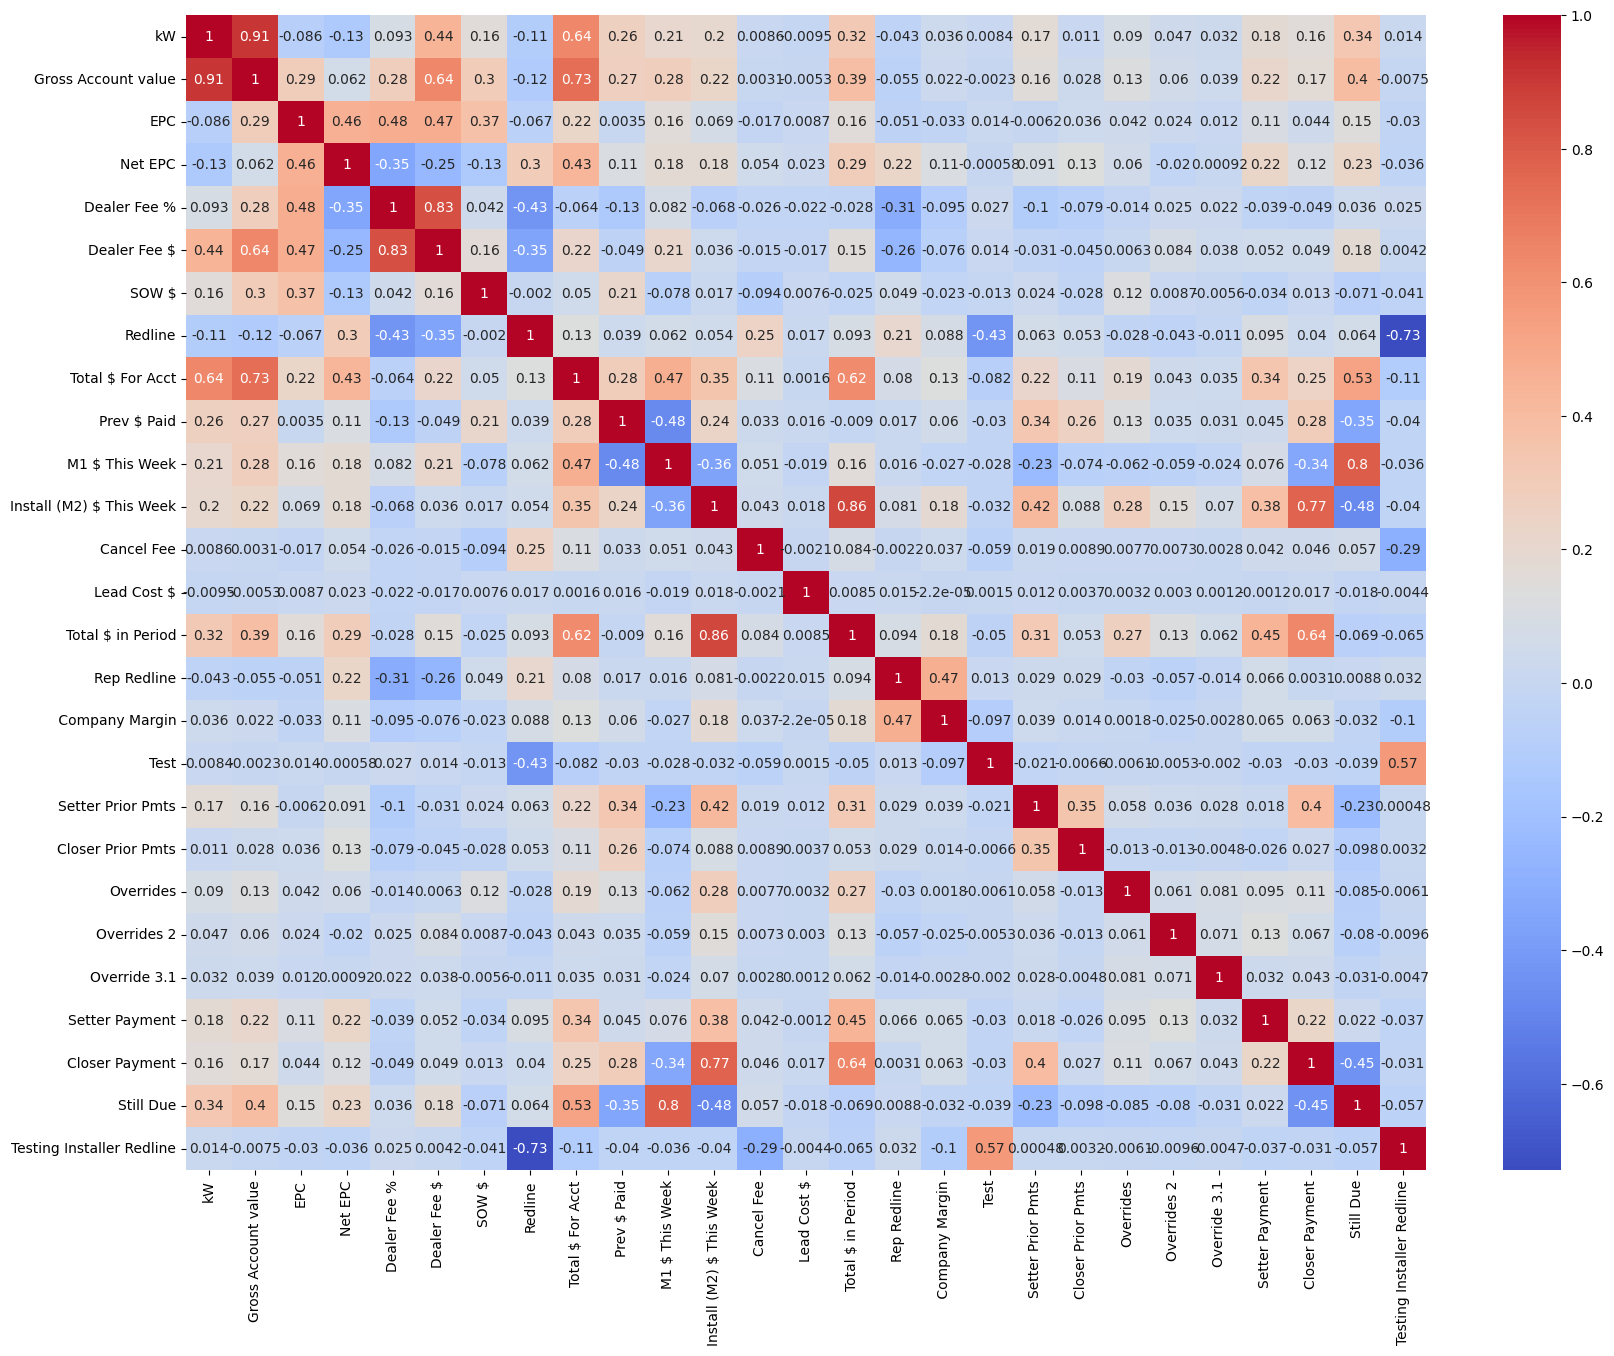

In [500]:
plt.figure(figsize=(20,15))
sns.heatmap(matrix,annot=True,cmap="coolwarm")

In [503]:
X = train[['Redline','Testing Installer Redline']]
y = train['Test']
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [486]:
regressor2 = regressor.fit(x_train,y_train)

In [489]:
pred2 =regressor2.predict(x_test)

In [490]:
mse2 = mean_squared_error(y_test,pred2)

In [492]:
print(mse2)

2385479.4894899083


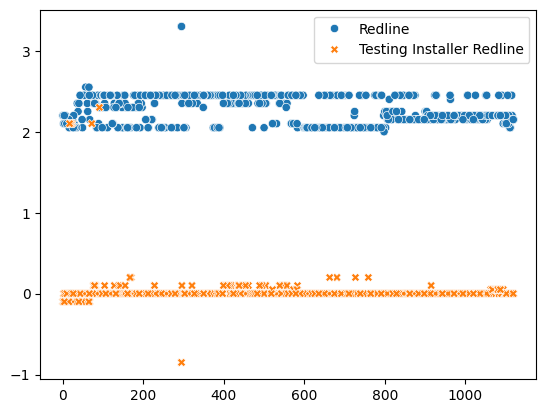

In [512]:
sns.scatterplot(x_train);

In [526]:
col = ['Redline','Testing Installer Redline']
def normalization(data,col_arr):
    for x in col_arr:
        mean = data[x].mean()
        data[x] -= mean
        std = data[x].std()
        data[x] /= std
    return data

In [527]:
def normalization_S(data):
    mean = data.mean()
    data -= mean
    std = data.std()
    data /= std
    return data

In [528]:
x_train= normalization(x_train,col)
x_test = normalization(x_test,col)
y_train = normalization_S(y_train)
y_test = normalization_S(y_test)

In [536]:
callbacks = [keras.callbacks.TensorBoard(log_dir='./logs',histogram_freq=1,update_freq=1),
             keras.callbacks.EarlyStopping(monitor='mse',patience=3)]

In [564]:
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_shape=(2,)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1))

model1.compile(optimizer='adam',loss='mse',metrics=['mse'])
history = model1.fit(x_train,y_train,epochs=50,callbacks=callbacks)

Epoch 1/50


2023-11-06 00:41:17.719877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 2s 27ms/step - loss: 0.9437 - mse: 0.9437
Epoch 2/50
27/27 [==============================] - 0s 8ms/step - loss: 0.9323 - mse: 0.9323
Epoch 3/50
27/27 [==============================] - 0s 8ms/step - loss: 0.9100 - mse: 0.9100
Epoch 4/50
27/27 [==============================] - 0s 8ms/step - loss: 0.8856 - mse: 0.8856
Epoch 5/50
27/27 [==============================] - 0s 8ms/step - loss: 0.7970 - mse: 0.7970
Epoch 6/50
27/27 [==============================] - 0s 8ms/step - loss: 0.8463 - mse: 0.8463
Epoch 7/50
27/27 [==============================] - 0s 8ms/step - loss: 0.7129 - mse: 0.7129
Epoch 8/50
27/27 [==============================] - 0s 8ms/step - loss: 0.9635 - mse: 0.9635
Epoch 9/50
27/27 [==============================] - 0s 8ms/step - loss: 1.0280 - mse: 1.0280
Epoch 10/50
27/27 [==============================] - 0s 8ms/step - loss: 0.8351 - mse: 0.8351
Epoch 11/50
27/27 [==============================] - 0s 8ms/step - loss: 0.9330

In [565]:
pred3 = model1.evaluate(x_train,y_train)

2023-11-06 00:41:28.218944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 6ms/step - loss: 0.7985 - mse: 0.7985


In [566]:
pred4 = model1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 15ms/step - loss: 0.7458 - mse: 0.7458


In [567]:
pred3

[0.7985332608222961, 0.7985332608222961]

In [568]:
pred4

[0.7457563281059265, 0.7457563281059265]

In [573]:
pred_final = model1.predict(x_test)

9/9 [==============================] - 0s 3ms/step


In [586]:
col_arr = ['Redline','Testing Installer Redline']
def denormaization(old_data,data,col_arr):
    for x in col_arr:
        std = old_data[x].std()
        data[x] * std
        mean = old_data[x].mean()
        data[x] += mean
    return data

In [589]:
# denormaization(train,pred_final,col_arr)

In [588]:
std = train['Redline'].std()

In [590]:
pred_final


array([[-0.34953395],
       [-0.11328034],
       [-0.34953395],
       [-0.29047054],
       [-0.11328034],
       [-0.29047054],
       [-0.11328034],
       [-0.34953395],
       [-0.11328034],
       [-0.11328034],
       [-0.5349001 ],
       [ 0.04255369],
       [-0.26093897],
       [-0.34953395],
       [-0.29047054],
       [-0.34953395],
       [-0.20187534],
       [ 0.04255369],
       [ 0.02370014],
       [ 8.757077  ],
       [-0.1428122 ],
       [-0.34953395],
       [-0.20187534],
       [-0.34953395],
       [-0.34953395],
       [-0.23140742],
       [-0.34953395],
       [-0.11328034],
       [-0.1428122 ],
       [ 0.5527688 ],
       [-0.20187534],
       [-0.20187534],
       [-0.34953395],
       [-0.34953395],
       [-0.34953395],
       [-0.34953395],
       [-0.11328034],
       [-0.11328034],
       [-0.11328034],
       [ 0.04255369],
       [-0.11328034],
       [-0.03536323],
       [-0.1428122 ],
       [ 0.04255369],
       [-0.34953395],
       [-0